Make a prediction about the coal production
3.9 Feature Engineering

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

In [23]:
df = pd.read_csv ("../data/cleaned_coalpublic2013.csv", header=0, index_col="MSHA ID")
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,10.933178
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,10.268374
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,14.180234
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,11.380388
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,11.901577


In [25]:
len(df)

1061

In [26]:
for column in df.columns:
    print column

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


In [42]:
len(df)

1061

In [46]:
#make log column
df['log_production'] = np.log(df['Production_(short_tons)'])

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


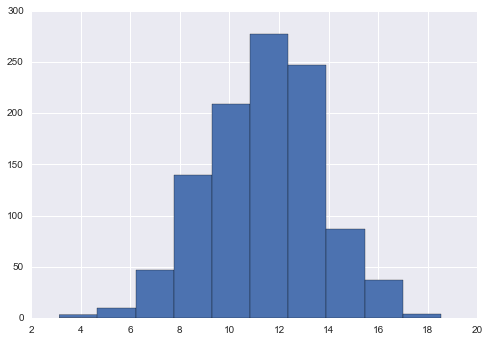

In [48]:
df.log_production.hist()
#almost a log normal distribution

In [27]:
#perhaps mine status is a predictor of mine production
df.Mine_Status.unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'], dtype=object)

In [28]:
df[['Mine_Status', 'Production_(short_tons)']].groupby("Mine_Status").mean()

,Production_(short_tons)
Mine_Status,
Active,1283470.735925
"Active, men working, not producing",125975.622754
"New, under construction",52.000000
Permanently abandoned,60504.968750
Temporarily closed,29666.397590


In [29]:
df[['Mine_Status', 'log_production']].groupby("Mine_Status").mean()

,log_production
Mine_Status,
Active,11.977453
"Active, men working, not producing",10.499962
"New, under construction",3.951244
Permanently abandoned,9.896046
Temporarily closed,9.162933


# predict the log of coal ins
3.10 Random Forest Prediction and Evaluation

In [41]:
features = [
    'Average_Employees',
    'Labor_Hours'
    ]

# turn categoricals into numbers for scikit learn
categoricals = [
    'Mine_State',
    'Mine_County',
    'Mine_Status',
    'Mine_Type',
    'Company_Type',
    'Operation_Type',
    'Operating_Company',
    'Union_Code',
    'Coal_Supply_Region',
    ]
#control { or } tabs in and out

target = 'log_production'

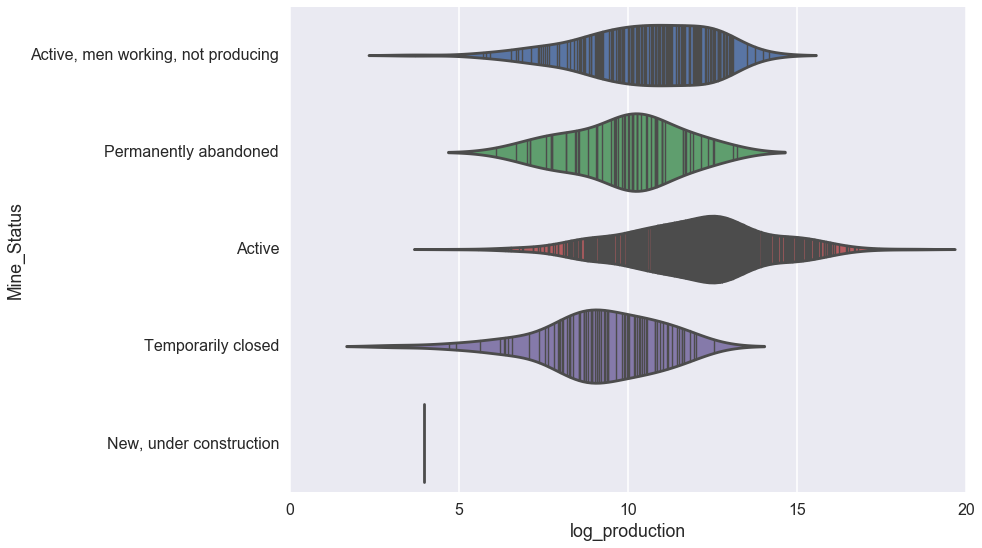

In [33]:
#seaborn violin plot function
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Mine_Status", x="log_production", data = df,
              split=True, inner="stick",)
plt.tight_layout()

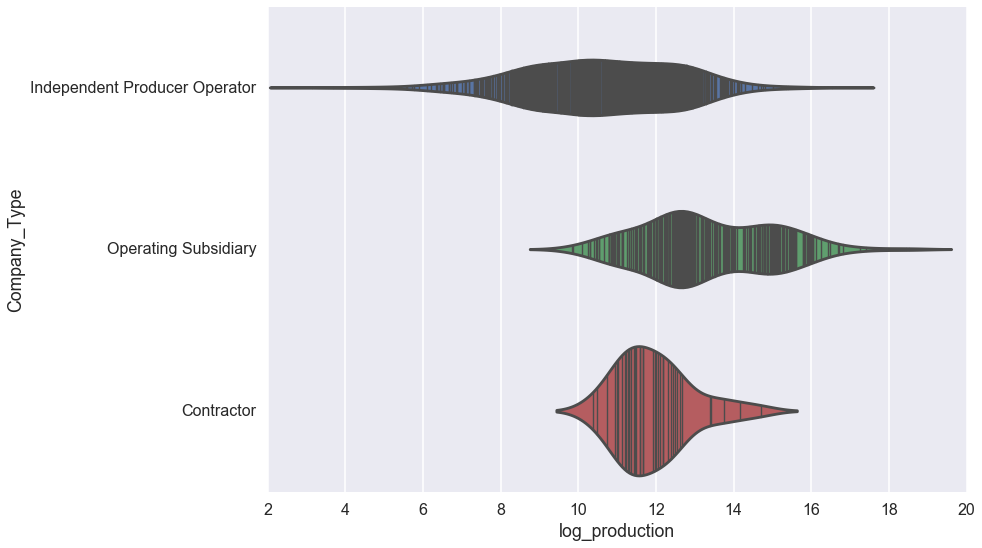

In [34]:
#seaborn violin plot function
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Company_Type", x="log_production", data = df,
              split=True, inner="stick",)
plt.tight_layout()

In [35]:
#unique company types
# assign Operator to 1, Subsidary to 2, and Contractor to 3
# but this assigns arbitrary order to items.
# so use get_dummies
df['Company_Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [37]:
pd.get_dummies(df['Company_Type']).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
3606905,0,1,0
4003273,0,1,0
4609246,0,1,0
1518547,0,0,1
4606263,0,0,1


In [47]:
#get each into dummy variables 
dummy_categoricals = []
for categorical in categoricals:
    print categorical, len(df[categorical].unique())
    # Avoid the dummy variable trap!
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 164
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Operating_Company 752
Union_Code 7
Coal_Supply_Region 8


dummy_categoricals[:10]

# Build our model

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [52]:
len(dummy_categoricals)

964

In [54]:
train, test = train_test_split(df, test_size=0.3)

In [59]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
#100 trues, out of back score is True

In [60]:
rf.fit(train[features + dummy_categoricals], train[target])
#just makes a long list of features and dummy_categoricals

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

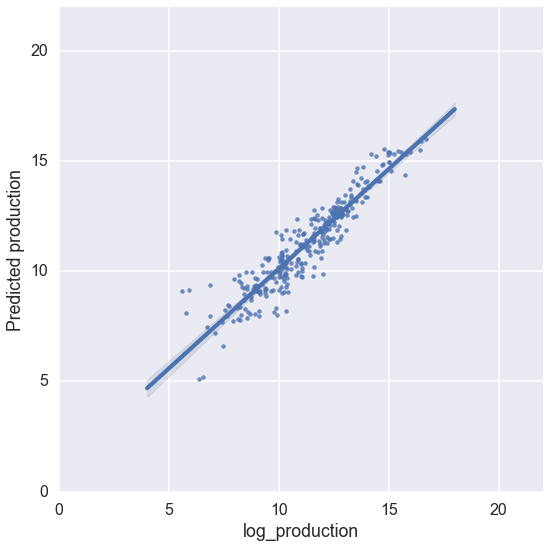

In [71]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features + dummy_categoricals]))
plt.xlim(0,22)
plt.ylabel("Predicted production")
plt.ylim(0,22)
plt.tight_layout()
#test (log_production) vs what we predict

In [63]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [64]:
predicted = rf.predict(test[features + dummy_categoricals])
r2_score(test[target], predicted)

0.87536042366533762

In [65]:
explained_variance_score(test[target], predicted)

0.87540450429321837

In [66]:
mean_squared_error(test[target], predicted)

0.56559392358272587

In [70]:
rf_importances = pd.DataFrame({'name':train[features + dummy_categoricals].columns,
                              'importance':rf.feature_importances_
                              }).sort_values(by='importance',
                                            ascending=False).reset_index(drop=True)

rf_importances.head(20)
#all importances below will add up to 1
# will tell you top 20 what contributed and how much percentage

,importance,name
0,0.820329,Labor_Hours
1,0.066822,Average_Employees
2,0.011781,Coal_Supply_Region_Powder River Basin
3,0.006292,Mine_Type_Surface
4,0.004695,Operating_Company_Commonwealth Environmental Sys
5,0.002672,Coal_Supply_Region_Appalachia Central
6,0.002526,Mine_County_Campbell
7,0.002491,"Operating_Company_West Fork Coal, Llc"
8,0.002451,Mine_Status_Active
9,0.002342,Operating_Company_Circle L Land Company Inc
